# Exploratory Data Analysis on StackOverflow Developer Survey 2020

This analysis is part of my course project on Data Analysis with Python: Zero to Pandas. In this project, I have performed a complete exploratory data analysis on the survey responses from Stack Overflow Developer Survey 2020.

Stack Overflow’s annual Developer Survey has been one of the largest, if not the largest, surveys of coders and programmers worldwide for almost a decade now. In the year 2020, this survey focused on being more representative of the diversity of programmers worldwide and it was taken by approximately 65,000 people.

This time, I have used a helper library called 'opendatasets' to download the required dataset. This library contains a collection of curated datasets and provides a helper function for direct download.

In [4]:
#importing the required library and downloading the required dataset
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

#checking/verifying if the dataset was downloaded into the directory
import os
os.listdir('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [6]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#loading the csv file into a dataframe
survey_rawdf = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_rawdf

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains about 65,000 responses to 61 questions. It seems that the responses have been anonymized in order to remove personally identifiable information. Instead, each respondent has been assigned a randomized respondent ID.

And since shortcuts have been used for the column names, we can view the schema file to view the full text of each question. We can load it as a series, with ColumnName as the index and Question as the value.

In [7]:
schema_srs = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col = 'Column').QuestionText
schema_srs

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Now I'm ready to move on to the next step, i.e. preprocessing and cleaning my data. Also, it's obvious that the survey contains tons of information, however, in this analysis, I will focus on the following areas:

- Demographics of the survey respondents and the global programming community.
- Distribution of programming skills, experience, and preferences.
- Employment-related information, preferences, and opinions.



## Data Preparation and Cleaning:

This process involves handling missing and invalid data, grouping by certain columns, selecting required columns, and so on.

In [8]:
#selecting a subset of columns with relevant data

selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

#creating/extracting a copy of the data from these columns into a new data frame so that we can continue to modify further without affecting the original data frame

survey_df = survey_rawdf[selected_columns].copy()
survey_df


,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
schema = schema_srs[selected_columns]
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

Some basic information about our dataframe:

In [10]:
survey_df.shape

(64461, 20)

We have 64461 rows(respondents) and 20 columns(questions).

In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object(they might contain values of different types or contain empty values (NaN).) Also, we can see that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows(64461) in each case. So we have to deal with empty values and might need to adjust the data type for each column manually on a case-by-case basis.

Similarly, only two of the columns, i.e. Age and WorkWeekHrs were detected as numeric columns. But there certainly are a few other columns that have numeric values like Age1stCode, YearsCode, YearsCodePro. So I will convert these columns into numeric data types.I will ignore any non-numeric values and convert them to NaN.

In [13]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors ='coerce')

In [14]:
#some basic statistics about our numeric columns
survey_df.describe()


,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


As we can see, the minimum value in the Age column is 1 and the maximum value is 279, which is quite unusual. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as they are invalid survey responses. Similarly, in the case of WorkWeekHrs, let's ignore the entries where the values for the column are higher than 140 hours(20 hours per day).


In [15]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [16]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In the Gender column, I'll remove the values that contain more than one option to simplify our analysis.

In [18]:
survey_df.where(~(survey_df.Gender.str.contains(';', na= False)), np.nan, inplace=True)

survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A sample of my dataframe:

In [22]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
13992,Russian Federation,27.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,14.0,4.0,Bash/Shell/PowerShell;HTML/CSS;Python;SQL,Python;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Data or business analyst;Engineer, data;Produc...",40.0,Slightly dissatisfied,Industry that I’d be working in;Office environ...,Often: 1-2 days per week or more,Somewhat important
33192,Iran,22.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",No,18.0,2.0,NaN,Dart;Java;Kotlin;SQL,Java;Kotlin;Python;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,"Not employed, but looking for work","Database administrator;Developer, desktop or e...",NaN,NaN,Flex time or a flexible schedule;Financial per...,NaN,Fairly important
63982,Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,22.0,7.0,1.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, full-stack",NaN,Very dissatisfied,NaN,NaN,Somewhat important
26644,United States,17.0,Man,Primary/elementary school,NaN,Yes,15.0,2.0,NaN,Python;Swift,Bash/Shell/PowerShell;JavaScript;Python;Swift,Once every few years,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
58667,United Kingdom,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Go;JavaScript;Python,Go;JavaScript;R;Rust;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
13554,The former Yugoslav Republic of Macedonia,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I never declared a major,Yes,28.0,5.0,4.0,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Not at all important/not necessary
18490,United States,26.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,16.0,10.0,6.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Somewhat important
39594,Iran,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,14.0,6.0,NaN,NaN,NaN,NaN,Employed part-time,NaN,NaN,NaN,NaN,NaN,Fairly important
3216,Germany,38.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,11.0,25.0,6.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Database administrator;Developer, full-stack;S...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
7273,Nigeria,19.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,NaN,1.0,NaN,NaN,NaN,Once a year,Watch help / tutorial videos,Student,NaN,NaN,NaN,NaN,NaN,NaN


Looks like our dataframe does not need any further cleaning, so moving on to the next step.

## Exploratory Analysis and Visualization:

In [23]:
#Setting some styles first

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (11, 7)
matplotlib.rcParams['figure.facecolor'] = '#0f0f0f80'

Before asking questions about the survey responses, it would be helpful to first understand the respondents' demographics(country, age, gender, education level, employment level, etc.) Exploring these variables will help explain how representative the survey is of the global programming community.

### Country:

Looking at the countries of the respondents and plotting the countries with the highest number of responses.


In [24]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

c:\users\beeka\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'15 Countries with the highest number of respondents'}, ylabel='Country'>

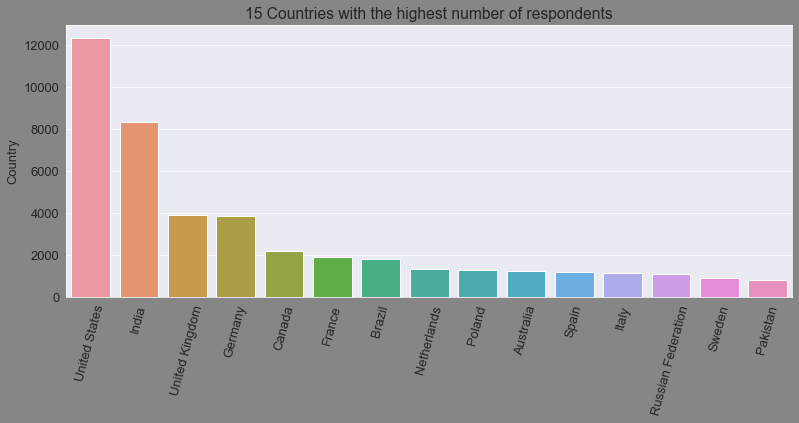

In [33]:
#visualizing this using a barplot; where index of this series is the xaxis and its values is the yaxis

plt.figure(figsize=(13,5))
plt.xticks(rotation=75) #since the labels displayed horizontaly will be messed up
plt.title("15 Countries with the highest number of respondents")
sns.barplot(top_countries.index, top_countries)

This shows that the highest number of respondents are from the USA and India. This could be because the survey is in English, and these countries have the highest English-speaking populations. So it seems that the survey is not representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented. Also, StackOverflow is a platform that is completely in English, so its user base is naturally from the countries where English is spoken or prioritized professionally.

So StackOverflow could try translating their surveys to different languages to encourage non-English speaking countries to participate and get a more representative result.

Now, let's find the percentage of responses from English-speaking vs. non-English speaking countries:

In [26]:
od.download('countries-languages-spoken')

lang_df = pd.read_csv('countries-languages-spoken/countries-languages.csv')

lang_df['English'] = lang_df['Languages Spoken'].str.contains('English') #creating a boolean column for strings that contain English

lang_df['LanguagePreferred'] = lang_df['English'].map({True:'English', False: 'NonEnglish'}) #using that column to map a differetn column to separate English and NonEnglish countries

lang_df

Using downloaded and verified file: .\countries-languages-spoken\countries-languages.csv


,Country,Languages Spoken,English,LanguagePreferred
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu...",False,NonEnglish
1,Albania,"Albanian (Tosk is the official dialect), Greek",False,NonEnglish
2,Algeria,"Arabic (official), French, Berber dialects",False,NonEnglish
3,Andorra,"Catalán (official), French, Castilian, Portuguese",False,NonEnglish
4,Angola,"Portuguese (official), Bantu and other African...",False,NonEnglish
...,...,...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...,True,English
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic",False,NonEnglish
195,Yemen,Arabic,False,NonEnglish
196,Zambia,"English (official); major vernaculars: Bemba, ...",True,English


In [27]:
merge_lang = survey_df.merge(lang_df, on='Country') #merging the two dataframes into a new one
lang_counts = merge_lang.LanguagePreferred.value_counts()
lang_counts = lang_counts/merge_lang.shape[0] *100 #converting it into percentage
lang_counts

English       62.853751
NonEnglish    37.146249
Name: LanguagePreferred, dtype: float64

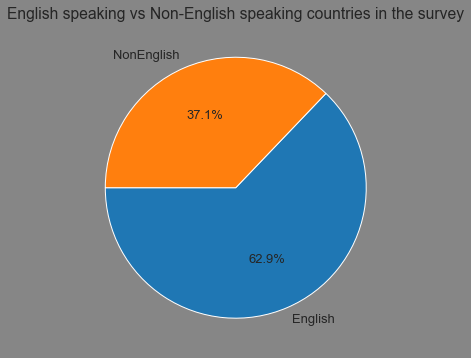

In [28]:
#using a piechart to plot it

plt.figure(figsize=(12,6))
plt.title("English speaking vs Non-English speaking countries in the survey")
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%', startangle=180);

So, almost 63% of the countries that participated in the survey use English as a spoken language or prioritize it professionally.

### Age:


(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

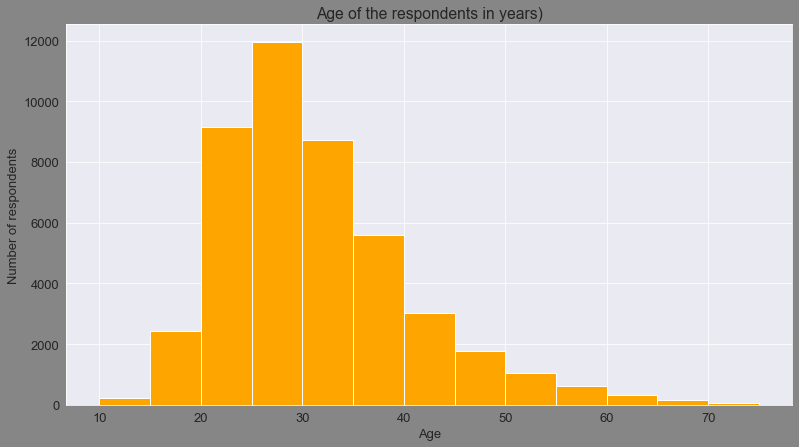

In [34]:
#using a histogram to visualize it

plt.figure(figsize=(13,7))
plt.title('Age of the respondents in years)')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age,  bins= np.arange(10,80,5), color= "Orange")

Most of the respondents fall between the age group 20-40, with 25-30 being the highest. So it seems that most of the youths are into programming.

Let's filter out the responses by age group in order to analyze and compare the survey results for different age groups. For this, I will create a new column called AgeGroup that contains values: Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years, and older than 60 years.

In [35]:
survey_df['AgeGroup'] = pd.cut(x=survey_df['Age'], bins=[0,10,18,30,45,60,100], labels=['Younger than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years'])

### Gender:

Let's look at the distribution of responses on the basis of Gender.

In [36]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

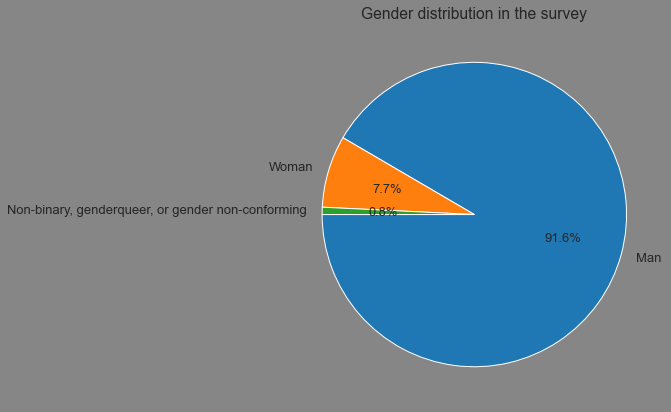

In [37]:
plt.figure(figsize=(13,7))
plt.title("Gender distribution in the survey")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

There seems to be a huge difference between the number of men and the number of women & non-binary genders in the programming field. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so it's obvious to see a skewed distribution here.

### Education Level:

Formal education in the computer science field is often considered significant to become a programmer. However, the present scenario of the technical field suggests otherwise. There are myriads of free resources & tutorials available online to learn to program. So let's compare the education levels of respondents to gain some insights.

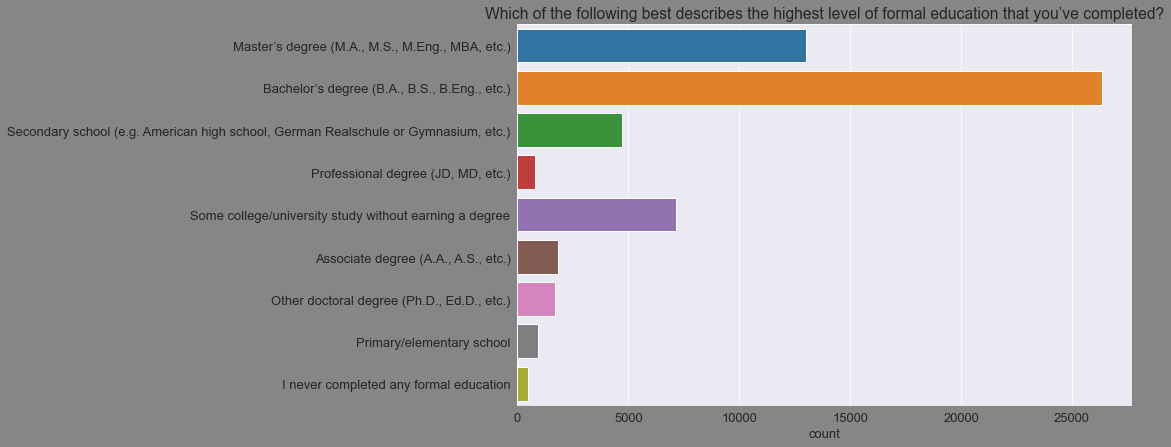

In [38]:
#using a horizontal barplot

sns.countplot(y=survey_df.EdLevel)
plt.title(schema['EdLevel'])
plt.ylabel(None);

Converting it to display it on the basis of percentage:

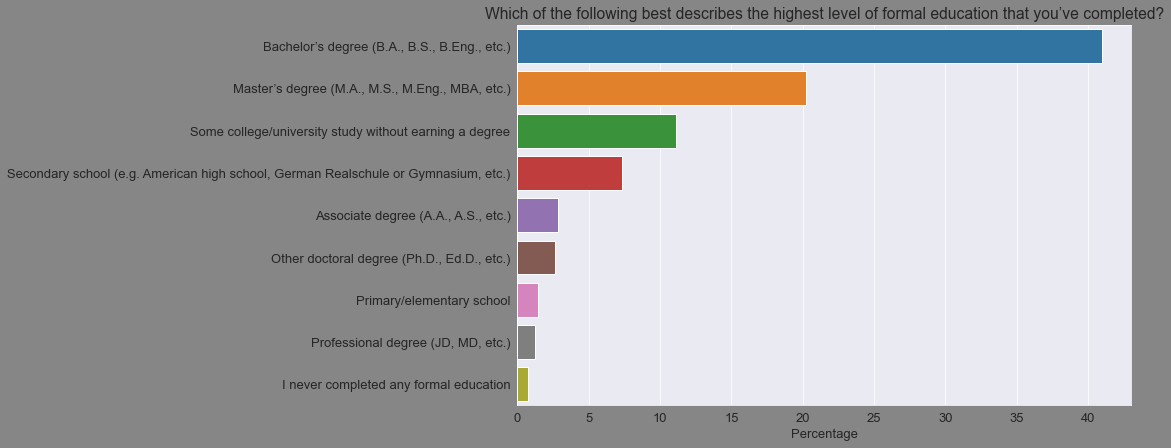

In [39]:
ed_counts = (survey_df.EdLevel.value_counts() * 100 / survey_df.shape[0]).round(2)

sns.barplot(x=ed_counts, y=ed_counts.index)
plt.title(schema['EdLevel'])
plt.xlabel('Percentage');

Comparing the percentages for each degree for men vs women:

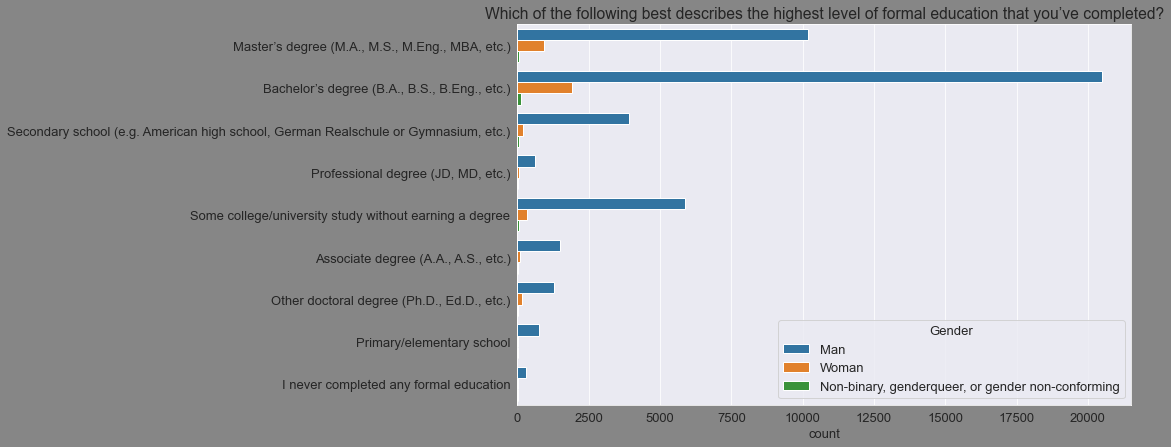

In [40]:
sns.countplot(y=survey_df.EdLevel, hue = survey_df.Gender)
plt.title(schema['EdLevel'])
plt.ylabel(None);

Plotting the undergraduate majors(on a percentages basis):

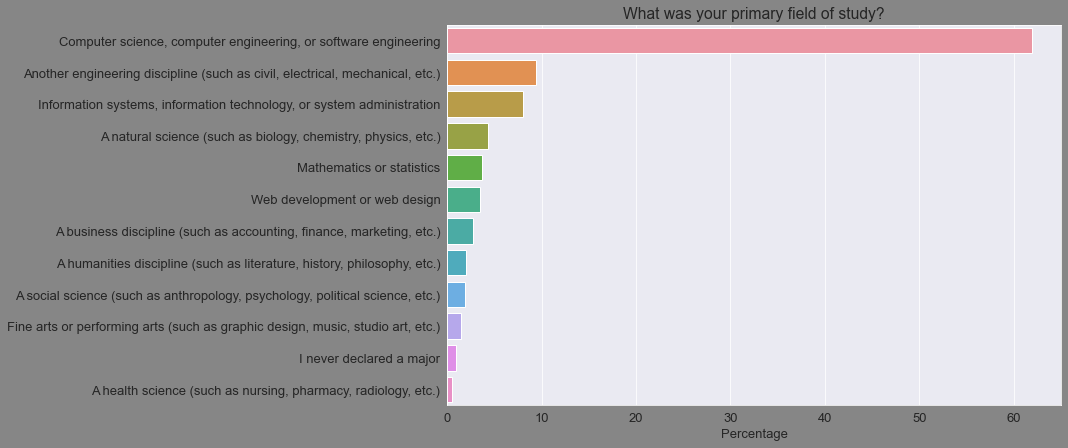

In [41]:
undergrad_counts = (survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()).round(2)

sns.barplot(x= undergrad_counts, y= undergrad_counts.index)
plt.title(schema['UndergradMajor'])
plt.xlabel("Percentage");

So from the above visualizations, it is clear that about 50% of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. And about 40% of those programmers holding a college degree have a field of study other than computer science. So, while a formal education is important in general, it is not mandatory for someone to pursue a degree in the field of computer science to become a programmer.


Let's analyze the NEWEdImpt column for respondents who hold some Computer Science degree vs. those who don't to see if there are any differences in opinion.

In [42]:
survey_df['degComp'] = (survey_df.UndergradMajor == 'Computer science, computer engineering, or software engineering')

survey_df['compdeg'] = survey_df['degComp'].map({True:'Computer Science', False: 'Not Computer Science'})

edimp_count= survey_df['NEWEdImpt'].value_counts()
edimp_count

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

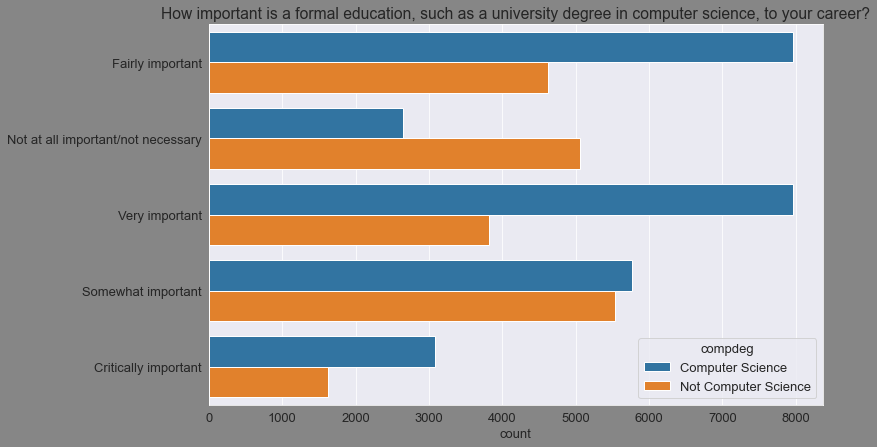

In [43]:
sns.countplot(y=survey_df.NEWEdImpt, hue = survey_df.compdeg)
plt.title(schema['NEWEdImpt'])
plt.ylabel(None);

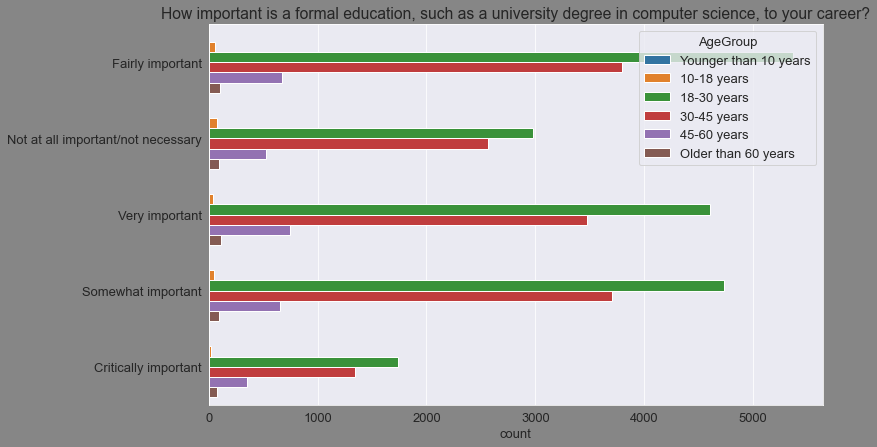

In [44]:
sns.countplot(y=survey_df.NEWEdImpt, hue = survey_df.AgeGroup)
plt.title(schema['NEWEdImpt'])
plt.ylabel(None);

So, the above graphs suggest that those who hold a degree in computer science believe that formal education(such as a university degree in computer science) is pretty significant for a programming career, whereas the ones who don't hold such a degree mostly seem to believe otherwise. Similarly, most of the people between the age groups 18-30 also suggest that a computer science degree is helpful.


### Employment:

Let's visualize the data from the Employment column.

In [45]:
survey_df.Employment.value_counts()

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

Text(0.5, 0, 'Percentage')

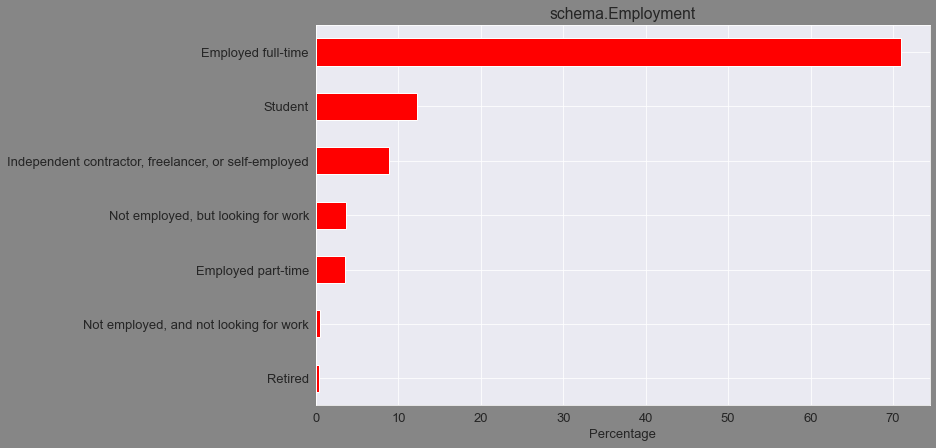

In [46]:
empcount = survey_df.Employment.value_counts(normalize = True, ascending = True) *100
empcount.plot(kind='barh', color='r')
plt.title('schema.Employment')
plt.xlabel('Percentage')

So, more than 70% of the respondents are employed full-time. Around 10% work as an independent contractor, freelancer, or are self-employed.

Now, let's add a new column EmploymentType that contains the values Enthusiast (student or not employed but looking for work), Professional (employed full-time, part-time or freelancing), and Other (not employed or retired).


In [47]:
groups = {
          'Enthusiast': ('Student', 'Not employed, but looking for work'),
          'Professional': ('Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed')
        }

empseries = pd.Series(survey_df.Employment) #creating a series for the Employment column

#creating a function to group the required members accordingly
from typing import Any

def membership_map(s: pd.Series, groups: dict,
                   fillvalue: Any=-1) -> pd.Series:
    # Reverse & expand the dictionary key-value pairs
    groups = {x: k for k, v in groups.items() for x in v}
    return s.map(groups).fillna(fillvalue)

survey_df['EmploymentType'] = membership_map(empseries, groups, fillvalue='Other')


The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon(;), which makes it a bit harder to analyze directly. So, let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.


In [48]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We can see that the dev_type_df has one column for each of the options that a respondent can select as a response. So, the corresponding column's value is True if s/he has chosen an option. Else, it is False.

Let's use the column-wise totals to identify the most common roles:

In [49]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

So, the most common roles include "Developer" in the name.

Let's figure out which positions have the highest percentage of women:

In [50]:
#joinging the two dataframes
merged_dev_type = survey_df.join(dev_type_df)

merged_dev_woman = merged_dev_type.loc[merged_dev_type['Gender'] == 'Woman']

#creating a dataframe only for the dev types for women
new_merged_dev = merged_dev_woman.loc[:, 'Developer, desktop or enterprise applications':'Marketing or sales professional']

new_devtype_totals = new_merged_dev.sum().sort_values(ascending=False)

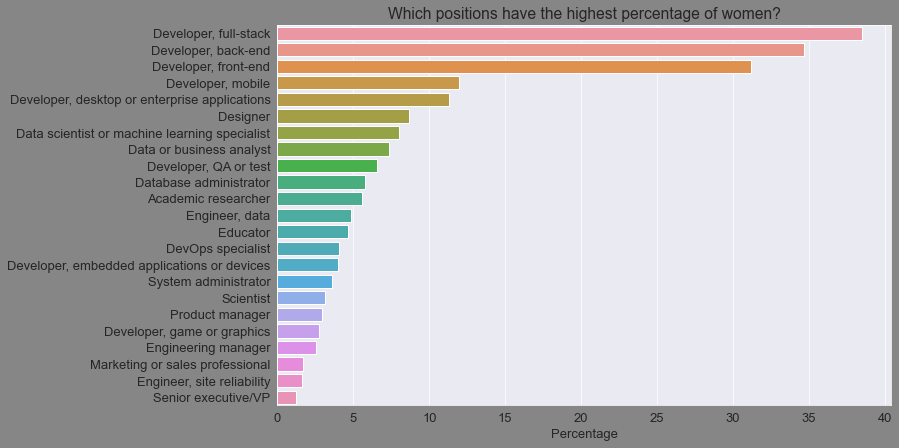

In [51]:
sns.barplot(x= ((new_devtype_totals* 100 / new_merged_dev.shape[0]).round(2)), y= new_devtype_totals.index)
plt.title('Which positions have the highest percentage of women?')
plt.xlabel("Percentage");

So, it seems that most of the women work as full-stack developers or backend developers.

## Now it’s time to take our analysis to the next step. Let's ask some questions about our data and answer them using visualizations and calculations.

### 1. What were the most popular programming languages in 2020?

For this, let's use the column 'LanguageWorkedWith'. Similar to DevType, respondents were allowed to choose multiple options here as well.

In [53]:
#spliting languageWorkedWith into a data frame containing a column of each listed languages

new_languagesWorked_df = split_multicolumn(survey_df.LanguageWorkedWith)
new_languagesWorked_df


,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 0, 'Percentage')

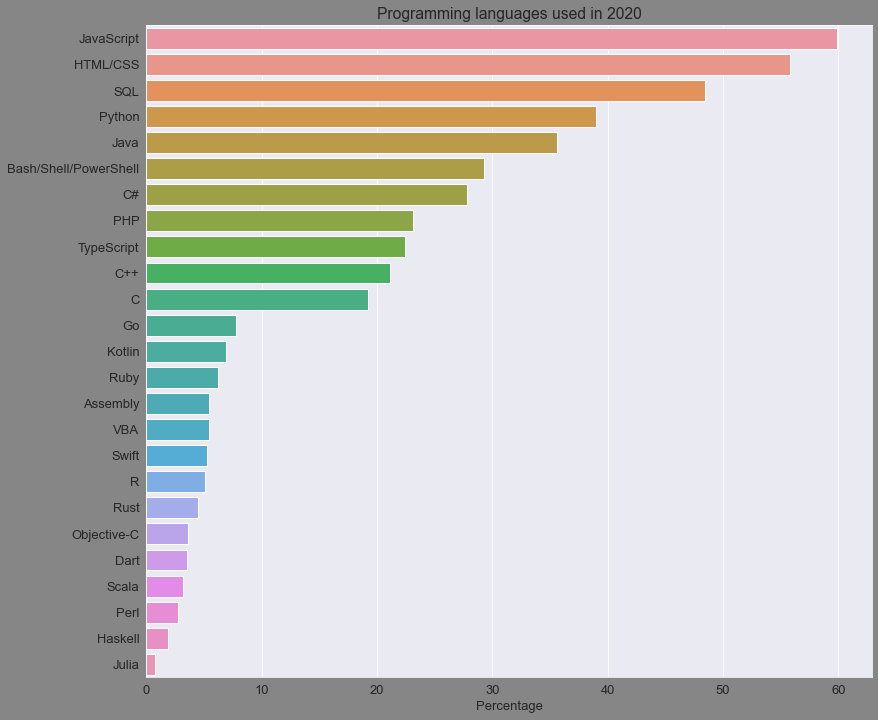

In [54]:
languages_percentage = new_languagesWorked_df.mean().sort_values(ascending=False) * 100

#plotting this in a horizontal bar chart

plt.figure(figsize = (13,12))
sns.barplot(x=languages_percentage, y = languages_percentage.index)
plt.title('Programming languages used in 2020')
plt.xlabel('Percentage')

Javascript & HTML/CSS were the most popular programming languages in 2020. This could be because web development is one of the most sought skills in today's world. This is followed by SQL, which is essential for working with relational databases, so it's mandatory for most programmers to work with it on a regular basis. Similarly, Python came out fourth on the list, which seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

### 2. What were the most common languages used by students? How does the list compare with the most common languages used by professional developers?

In [55]:
merged_languages = survey_df.join(new_languagesWorked_df)

students_merged_lang = merged_languages.loc[merged_languages['EmploymentType'] == 'Enthusiast']

prof_merged_lang = merged_languages.loc[merged_languages['EmploymentType'] == 'Professional']


Text(0.5, 0, 'Percentage')

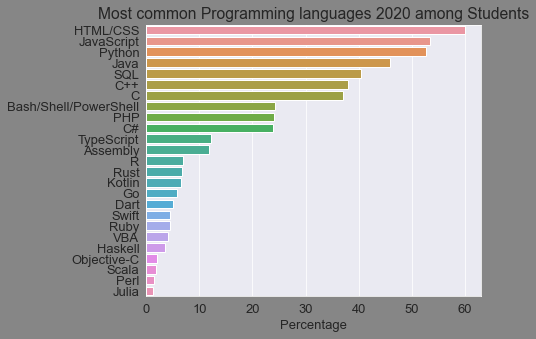

In [58]:
new_students_merged_lang = students_merged_lang.loc[:,'C#':'Assembly']
new_students_merged_lang_percentage = new_students_merged_lang.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_students_merged_lang_percentage, y = new_students_merged_lang_percentage.index)
plt.title('Most common Programming languages 2020 among Students')
plt.xlabel('Percentage')

The most popular language among students was HTML/CSS.

Text(0.5, 0, 'Percentage')

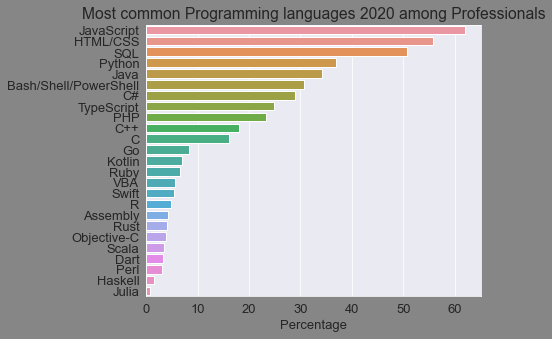

In [59]:
new_prof_merged_lang = prof_merged_lang.loc[:,'C#':'Assembly']
new_prof_merged_lang_percentage = new_prof_merged_lang.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_prof_merged_lang_percentage, y = new_prof_merged_lang_percentage.index)
plt.title('Most common Programming languages 2020 among Professionals')
plt.xlabel('Percentage')

Whereas, JavaScript was the most popular among Professionals.

### 3. What were the most common languages among respondents who did not describe themselves as "Developer, front-end"?

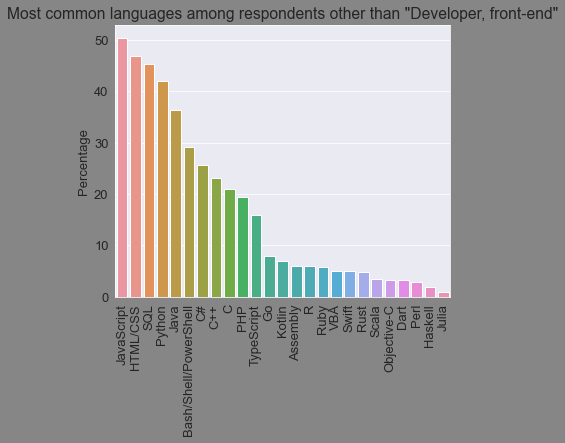

In [62]:
merged_df_lang_dev = merged_dev_type.join(new_languagesWorked_df)

merged_df_lang_dev_df = merged_df_lang_dev.loc[merged_df_lang_dev['Developer, front-end'] == False]

new_merged_df_lang_dev_df = merged_df_lang_dev_df.loc[:,'C#':'Assembly']
new_merged_df_lang_dev_df_percentage = new_merged_df_lang_dev_df.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_merged_df_lang_dev_df_percentage.index, y = new_merged_df_lang_dev_df_percentage);
plt.title('Most common languages among respondents other than "Developer, front-end"')
plt.ylabel('Percentage')
plt.xticks(rotation=90);

Still, JavaScript was the most common language among respondents who did not describe themselves as "Developer, front-end".

### 4. What were the most common languages among respondents who work in fields related to data science?

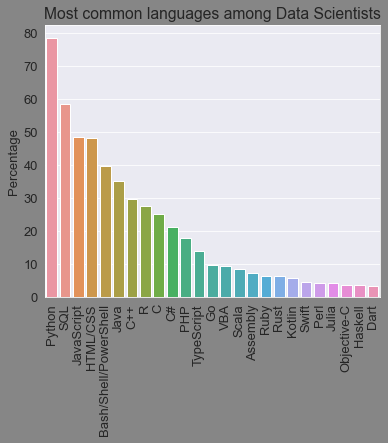

In [65]:
ds_merged_lang_df = merged_df_lang_dev.loc[merged_df_lang_dev['Data scientist or machine learning specialist'] == True]

new_ds_merged_lang_df = ds_merged_lang_df.loc[:,'C#':'Assembly']
new_ds_merged_lang_df_percentage = new_ds_merged_lang_df.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=new_ds_merged_lang_df_percentage.index, y = new_ds_merged_lang_df_percentage);
plt.title('Most common languages among Data Scientists')
plt.ylabel('Percentage')
plt.xticks(rotation=90);

So, Python was the most used language among data scientists, followed by SQL.

### 5. What were the most common languages used by developers older than 35 years of age?

In [67]:
old_merged_df_lang_dev = merged_df_lang_dev.loc[merged_df_lang_dev['Age'] > 35]

new_old_merged_df_lang_dev = old_merged_df_lang_dev.loc[:,'C#':'Assembly']
new_old_merged_df_lang_dev_percentage = new_old_merged_df_lang_dev.mean().sort_values(ascending=False) * 100
new_old_merged_df_lang_dev_percentage

JavaScript               64.874070
SQL                      59.191539
HTML/CSS                 58.510352
Bash/Shell/PowerShell    40.198978
Python                   37.716232
C#                       35.170745
Java                     32.356368
PHP                      22.757014
TypeScript               22.559828
C++                      18.929820
C                        17.325446
VBA                       8.729945
Go                        8.694093
Ruby                      8.192166
Perl                      6.417496
Swift                     5.727346
Kotlin                    5.548086
R                         5.521197
Assembly                  5.090974
Objective-C               4.678677
Rust                      3.916824
Scala                     3.531415
Dart                      2.169042
Haskell                   1.353410
Julia                     0.842520
dtype: float64

Javascript was the most popular language among the people older than 35 years.

### 6. What were the most common languages used by developers in Nepal?

In [68]:
country_merged_df_lang_dev = merged_df_lang_dev.loc[merged_df_lang_dev['Country'] == 'Nepal']

new_country_merged_df_lang_dev = country_merged_df_lang_dev.loc[:,'C#':'Assembly']
new_country_merged_df_lang_dev_percentage = new_country_merged_df_lang_dev.mean().sort_values(ascending=False) * 100

new_country_merged_df_lang_dev_percentage

JavaScript               61.666667
HTML/CSS                 60.833333
SQL                      42.916667
Java                     39.583333
Python                   36.666667
C                        34.166667
PHP                      31.250000
C++                      28.750000
C#                       20.833333
TypeScript               20.416667
Bash/Shell/PowerShell    16.250000
Dart                      7.500000
Kotlin                    6.250000
Ruby                      4.583333
Go                        4.166667
Assembly                  4.166667
Objective-C               3.333333
Swift                     3.333333
R                         2.916667
VBA                       2.500000
Rust                      2.083333
Haskell                   0.416667
Julia                     0.416667
Perl                      0.000000
Scala                     0.000000
dtype: float64

In my country, JavaScript is the most used programming language.

From the above visualizations, it can be concluded that JavaScript is the most preferred programming language among numerous programming groups.

### 7. Which languages were the most people interested to learn over the next year?

For this, I will use the LanguageDesireNextYear column.

Text(0.5, 0, 'Percentage')

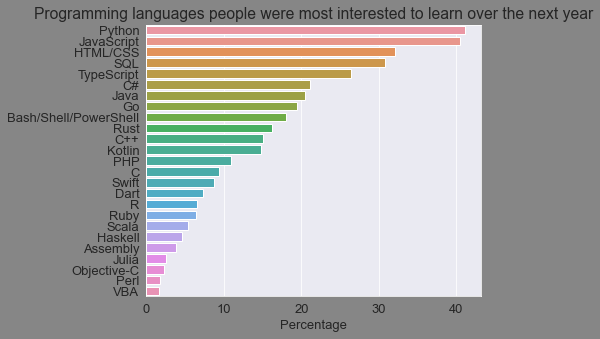

In [70]:
ny_languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
ny_languages_interested_percentages = ny_languages_interested_df.mean().sort_values(ascending=False) * 100

plt.figure(figsize = (6,5))
sns.barplot(x=ny_languages_interested_percentages, y = ny_languages_interested_percentages.index)
plt.title('Programming languages people were most interested to learn over the next year')
plt.xlabel('Percentage')

Thus, most of the respondents were interested in learning Python over the next year. Obviously, it is an easy-to-learn general-purpose programming language and is well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, and so on. Moreover, I'm using Python for this exploratory analysis as well!

### 8. What were the most loved programming languages, i.e., a high percentage of people who have used the language and want to continue learning & using it over the next year as well?

For this, I will create a new data frame(languages_loved_df) that contains a True value for a language only if the corresponding values in new_languagesWorked_df and ny_languages_interested_df are both True.
Then, I will take the column-wise sum of languages_loved_df and divide it by the column-wise sum of languages_worked_df to get the percentage of respondents who "love" the language.
Finally, I will sort the results in decreasing order and plot a graph

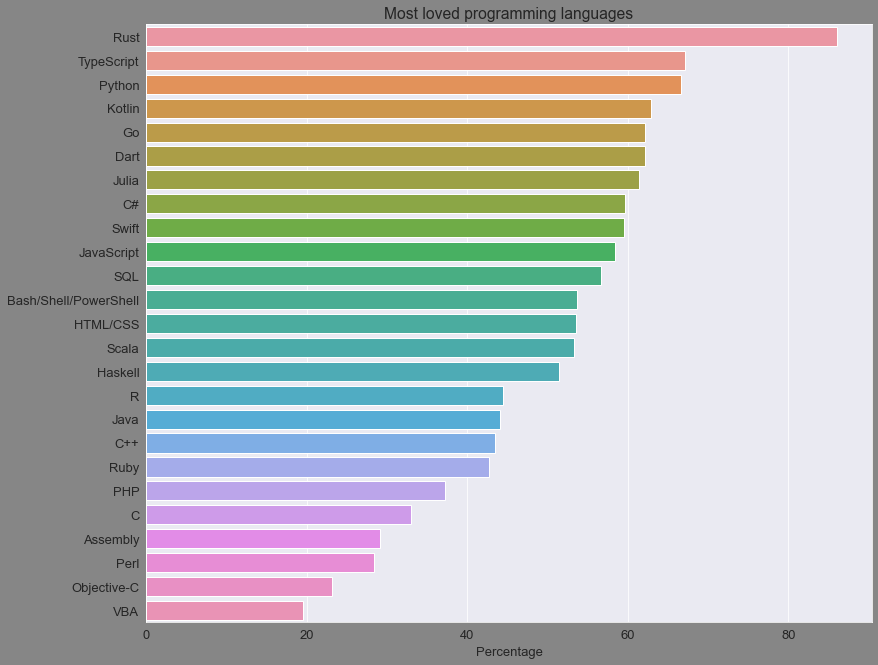

In [71]:
languages_loved_df = new_languagesWorked_df & ny_languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ new_languagesWorked_df.sum()).sort_values(ascending=False)

plt.figure(figsize=(13, 11))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved programming languages");
plt.xlabel('Percentage');

Rust was the most loved programming language in 2020 and it has been StackOverflow's most-loved language for four years in a row. The second most-loved language was TypeScript, which is a popular alternative to JavaScript for web development. Similarly, Python was at number 3.

### 9. What were the most dreaded languages, i.e., languages people used in the past year but do not want to learn/use over the next year?

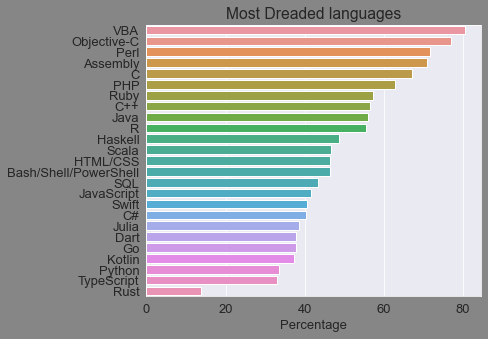

In [72]:
dreaded_lang_df = new_languagesWorked_df & ~ny_languages_interested_df
languages_dreaded_percentages = (dreaded_lang_df.sum() * 100/ new_languagesWorked_df.sum()).sort_values(ascending=False)

plt.figure(figsize=(6, 5))
sns.barplot(x=languages_dreaded_percentages, y=languages_dreaded_percentages.index)
plt.title("Most Dreaded languages");
plt.xlabel('Percentage');

VBA was the most dreaded language in 2020, followed by Objective-C.

### 10.  In which countries did developers work the highest number of hours per week? Consider countries with more than 250 responses only.

For this, I will use the groupby method to aggregate the rows for each country. Then, I'll filter the results to only include the countries with more than 250 respondents.

In [73]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Among the countries with more than 250 responses, Iran, Israel and China seem to have the highest working hours. This is followed by the United States. However, there isn't much variation overall as the average working hours is around 41 hours per week for each country.

### 11. How did the average work hours compare across continents?

In [74]:
continent_data_df = pd.read_csv('./continent.csv')

continent_data_df = continent_data_df.rename(columns = {'location' :'Country'}, inplace = False) #renaming the column 'location' to 'Country'

coun_con_df = survey_df.merge(continent_data_df, on='Country')

new_continent_df = coun_con_df.groupby('continent')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
new_continent_df

,WorkWeekHrs
continent,
North America,41.472749
Asia,40.482526
Oceania,39.951056
Europe,39.173291
Africa,38.734334
South America,38.387286


So, North America was the continent with the highest working hours followed by Asia.

### 12. Which role had the highest average number of hours worked per week? Which one had the lowest?

In [78]:
#highest
highest_work_df = survey_df.groupby('DevType')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False).reset_index()
highest_work_df

,DevType,WorkWeekHrs
0,"Developer, back-end;DevOps specialist;Engineer...",140.0
1,"Data or business analyst;Developer, back-end;D...",140.0
2,"Developer, full-stack;Developer, mobile;Develo...",130.0
3,Data or business analyst;Data scientist or mac...,126.0
4,Data scientist or machine learning specialist;...,120.0
...,...,...
8208,Engineering manager;Product manager;Scientist,NaN
8209,Engineering manager;Product manager;Scientist;...,NaN
8210,Engineering manager;Product manager;System adm...,NaN
8211,Marketing or sales professional;Product manage...,NaN


In [79]:
#lowest
lowest_work_df = survey_df.groupby('DevType')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=True).reset_index()
lowest_work_df

,DevType,WorkWeekHrs
0,Academic researcher;Data or business analyst;D...,1.0
1,Data or business analyst;Data scientist or mac...,1.5
2,Academic researcher;Database administrator;Dev...,2.0
3,"Database administrator;Developer, back-end;Dev...",3.0
4,"Database administrator;Designer;Developer, des...",3.0
...,...,...
8208,Engineering manager;Product manager;Scientist,NaN
8209,Engineering manager;Product manager;Scientist;...,NaN
8210,Engineering manager;Product manager;System adm...,NaN
8211,Marketing or sales professional;Product manage...,NaN


### 13. How did the hours worked compare between freelancers and developers working full-time?

In [80]:
empl_type_df = split_multicolumn(survey_df.Employment)

new_empl_df = survey_df.join(empl_type_df)

In [81]:
#for full-time
full_time_df = new_empl_df.loc[new_empl_df['Employed full-time'] == True]
fulltime_work_df = full_time_df.groupby('Employed full-time')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False).reset_index()
fulltime_work_df

,Employed full-time,WorkWeekHrs
0,True,40.424072


In [82]:
#for freelancers
freelance_df = new_empl_df.loc[new_empl_df['Independent contractor, freelancer, or self-employed'] == True]
freelance_work_df = freelance_df.groupby('Independent contractor, freelancer, or self-employed')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False).reset_index()
freelance_work_df

,"Independent contractor, freelancer, or self-employed",WorkWeekHrs
0,True,40.114209


So it seems there isn't much difference between developers employed full-time and freelancers. Both have an average working hour of around 40 hours per week.

### 14. How important is it to start young to build a career in programming?
For this, I will create a scatter plot of Age vs. YearsCodePro(years of coding experience):

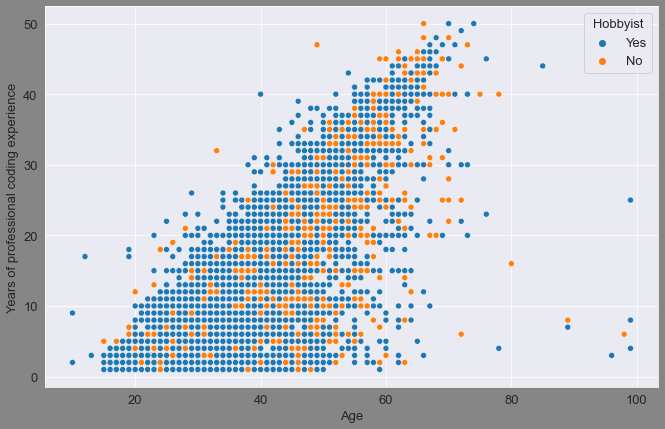

In [83]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

There are points all over the graph, which indicates that one can start programming professionally at any age. Similarly, most of the people who have been coding for a long time professionally also seem to take it as a hobby.

Let's view the distribution of the Age1stCode column to find out when the respondents tried programming for the first time:

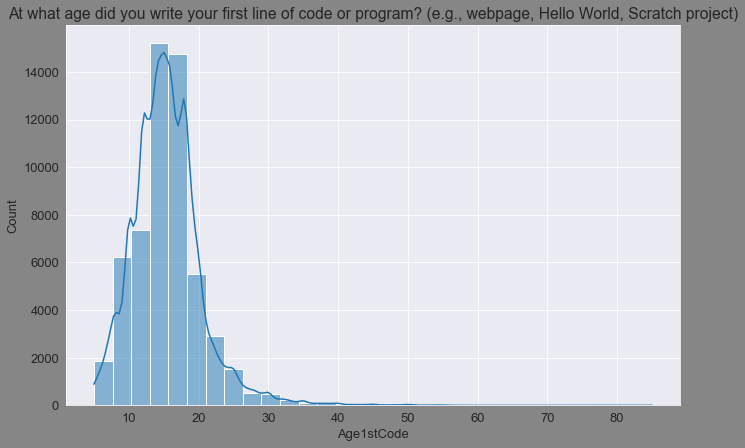

In [84]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

So it seems that most of the respondents started programming before the age of 40. However, the graph also shows people of all age groups involved in coding, which is quite encouraging.

## Inferences and Conclusion:


Through my exploratory data analysis on the Stack Overflow Developer Survey 2020 dataset, I came across the following conclusions:


1. The highest number of respondents were from the USA and India. And almost 63% of the participants in the survey were from countries that use English as a spoken language or prioritize it professionally. So, based on the respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community, but it has comparatively fewer responses from programmers in non-English-speaking countries.


2. Most of the respondents fall between the age group 20–40, with the majority between the ages 25–30. Thus, most of the youths are into programming.


3. Only about 8% of survey respondents who have answered the question identify as women or non-binary and about 92% are men. So it can be concluded that there is a huge difference between the number of men and the number of women & non-binary genders in the programming field.


4. About 50% of the respondents hold a bachelor's or master's degree, but about 40% of those programmers holding a college degree have a field of study other than computer science. So, while a formal education is important in general, it is not mandatory for someone to pursue a degree in the field of computer science to become a programmer or make a career out of it.


5. More than 70% of the respondents are employed full-time. Around 10% work as an independent contractor, freelancer, or are self-employed.


6. Most of the women work as full-stack developers or backend developers.


7. Javascript & HTML/CSS were the most popular programming languages in 2020. This was followed by SQL and Python.


8. The most popular language among students was HTML/CSS, whereas JavaScript was the most popular among Professionals. Moreover, JavaScript was the most preferred programming language among numerous groups.


9. Python was the most used language among data scientists, followed by SQL.


10. Rust and TypeScript were the most loved programming language in 2020, followed by Python, whereas VBA and Objective-C were the most dreaded ones, followed by Perl.


11. Most of the respondents were interested in learning Python over the next year.


12. The average working hours for programmers was around 41 hours per week. North America was the continent with the highest working hours followed by Asia.


13. Most of the respondents started programming before the age of 40, although people of all age groups were involved in coding. We can conclude that a person can learn to code at any age.

#### Suggestions:

- StackOverflow could try translating their surveys to different languages to encourage non-English speaking countries to participate and get a more representative result. Similarly, they should focus on making more efforts that encourage underrepresented communities to participate in the surveys.


- Computer Science is indeed a challenging field, and making a career in any of its domains requires a lot of dedication and practice. However, if someone is passionate enough, and is ready to invest a reasonable amount of time and effort, then they can start their journey right away, regardless of their age, education level, gender, or any other factors. There are ample amount of resources online that can help them throughout their learning process- one just needs to start exploring.